In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt


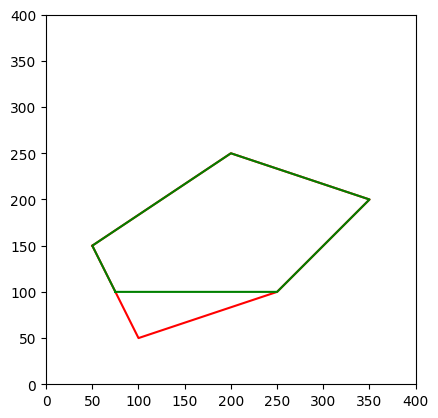

In [ ]:
MAX = 15

class Vertex:
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Edge:
    def __init__(self, vertex1, vertex2):
        self.vertex = [vertex1, vertex2]

def Output(newVertex, outLength, outVertexArray):
    outVertexArray.append(newVertex)
    outLength[0] += 1

def Inside(testVertex, clipBoundary):
    x1, y1 = clipBoundary.vertex[0].x, clipBoundary.vertex[0].y
    x2, y2 = clipBoundary.vertex[1].x, clipBoundary.vertex[1].y
    return ((x2 - x1) * (testVertex.y - y1) - (y2 - y1) * (testVertex.x - x1)) >= 0

def Intersect(first, second, clipBoundary):
    x1, y1 = first.x, first.y
    x2, y2 = second.x, second.y
    x3, y3 = clipBoundary.vertex[0].x, clipBoundary.vertex[0].y
    x4, y4 = clipBoundary.vertex[1].x, clipBoundary.vertex[1].y

    denom = (y4 - y3) * (x2 - x1) - (x4 - x3) * (y2 - y1)
    nume_a = (x4 - x3) * (y1 - y3) - (y4 - y3) * (x1 - x3)
    ua = nume_a / denom

    intersectPt = Vertex(x1 + ua * (x2 - x1), y1 + ua * (y2 - y1))
    return intersectPt

def SutherlandHodgmanPolygonClip(InVertexArray, outVertexArray, InLength, outLength, clipBoundary):
    s = InVertexArray[InLength - 1]
    for i in range(InLength):
        p = InVertexArray[i]
        if Inside(p, clipBoundary):
            if Inside(s, clipBoundary):
                Output(p, outLength, outVertexArray)
            else:
                intersectPt = Intersect(s, p, clipBoundary)
                Output(intersectPt, outLength, outVertexArray)
                Output(p, outLength, outVertexArray)
        elif Inside(s, clipBoundary):
            intersectPt = Intersect(s, p, clipBoundary)
            Output(intersectPt, outLength, outVertexArray)
        s = p

def plot_polygon(vertexArray, color):
    x = [vertex.x for vertex in vertexArray]
    y = [vertex.y for vertex in vertexArray]
    x.append(vertexArray[0].x)
    y.append(vertexArray[0].y)
    plt.plot(x, y, color)

def main():
    inVertexArray = [Vertex(50, 150), Vertex(200, 250), Vertex(350, 200), Vertex(250, 100), Vertex(100, 50)]
    inLength = len(inVertexArray)
    outVertexArray = []
    outLength = [0]
    clipBoundary = Edge(Vertex(100, 100), Vertex(300, 100))

    SutherlandHodgmanPolygonClip(inVertexArray, outVertexArray, inLength, outLength, clipBoundary)

    plt.figure()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim(0, 400)
    plt.ylim(0, 400)

    plot_polygon(inVertexArray, 'r')
    plot_polygon(outVertexArray, 'g')

    plt.show()

if __name__ == "__main__":
    main()


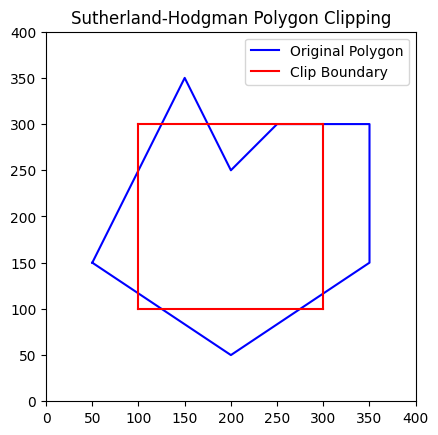

In [ ]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Edge:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2

def output(new_vertex, out_vertex_array):
    out_vertex_array.append(new_vertex)

def inside(test_vertex, clip_boundary):
    if clip_boundary.p1.x == clip_boundary.p2.x:
        return (clip_boundary.p2.x > clip_boundary.p1.x and test_vertex.x >= clip_boundary.p1.x) or \
               (clip_boundary.p2.x < clip_boundary.p1.x and test_vertex.x <= clip_boundary.p1.x)
    else:
        return (clip_boundary.p2.y > clip_boundary.p1.y and test_vertex.y >= clip_boundary.p1.y) or \
               (clip_boundary.p2.y < clip_boundary.p1.y and test_vertex.y <= clip_boundary.p1.y)

def intersect(first, second, clip_boundary):
    if clip_boundary.p1.x == clip_boundary.p2.x:
        x = clip_boundary.p1.x
        y = first.y + (second.y - first.y) * (x - first.x) / (second.x - first.x)
    else:
        y = clip_boundary.p1.y
        x = first.x + (second.x - first.x) * (y - first.y) / (second.y - first.y)
    return Point(x, y)

def sutherland_hodgman_polygon_clip(in_vertex_array, clip_boundary):
    if not in_vertex_array:
        return []

    out_vertex_array = []
    s = in_vertex_array[-1]
    for p in in_vertex_array:
        if inside(p, clip_boundary):
            if inside(s, clip_boundary):
                output(p, out_vertex_array)
            else:
                i = intersect(s, p, clip_boundary)
                output(i, out_vertex_array)
                output(p, out_vertex_array)
        elif inside(s, clip_boundary):
            i = intersect(s, p, clip_boundary)
            output(i, out_vertex_array)
        s = p
    return out_vertex_array

def draw_polygon(vertices, color='blue', label=None):
    x = [v.x for v in vertices] + [vertices[0].x]
    y = [v.y for v in vertices] + [vertices[0].y]
    plt.plot(x, y, color=color, label=label)

if __name__ == "__main__":
    in_vertex_array = [Point(50, 150), Point(200, 50), Point(350, 150), Point(350, 300), Point(250, 300), Point(200, 250), Point(150, 350), Point(100, 250), Point(50, 150)]
    clipper = [Edge(Point(100, 100), Point(300, 100)), Edge(Point(300, 100), Point(300, 300)), Edge(Point(300, 300), Point(100, 300)), Edge(Point(100, 300), Point(100, 100))]

    clipped_polygon = in_vertex_array
    for edge in clipper:
        if not clipped_polygon:
            break
        clipped_polygon = sutherland_hodgman_polygon_clip(clipped_polygon, edge)

    plt.figure()
    draw_polygon(in_vertex_array, 'blue', label='Original Polygon')
    for edge in clipper:
        plt.plot([edge.p1.x, edge.p2.x], [edge.p1.y, edge.p2.y], 'red', label='Clip Boundary' if edge == clipper[0] else "")
    if clipped_polygon:
        draw_polygon(clipped_polygon, 'green', label='Clipped Polygon')
        plt.fill([v.x for v in clipped_polygon], [v.y for v in clipped_polygon], color='green', alpha=0.5)

    plt.title('Sutherland-Hodgman Polygon Clipping')
    plt.xlim(0, 400)
    plt.ylim(0, 400)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()
